<a href="https://colab.research.google.com/github/wlgns0313/test1/blob/main/chapter02_mathematical_building_blocks_i%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#2번째 줄 코드 예시 : (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
mnist.load_data?
#mnist.load_data?와 같이 코드 뒤에 ?를 붙이면 설명서 출력

In [27]:
train_images.shape
#shape : 28x28과 같이 크기를 알려주는 듯

(60000, 28, 28)

In [24]:
train_images[59999]
# train_images에 60000개의 28x28(Pixel) 그림이 존재

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  38,  48,  48,  22,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         62,  97, 198, 243, 254, 254, 212,  27,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  67,
        172, 254, 254, 225, 218, 218, 237, 248,  40,   0,  21, 164, 187,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89, 219,
        254,  97,  67,  14,   0,   0,  92, 231, 122,  23, 203, 236,  59,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 217, 242,
         92,   4,   0,   0,   0,   0,   4, 147, 253, 240, 232,  92,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 101, 255,  92,
          0,   0,   0,   0,   0,   0, 105, 254, 254, 177,  11,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 167, 244,  41,
          0,   0,   0,   7,  76, 199, 238, 239,  94,  10,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 192, 121,   0,
          0,   2,  63, 180, 254, 233, 126,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 190, 196,  14,
          2,  97, 254, 252, 146,  52,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 130, 225,  71,
        180, 232, 181,  60,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 130, 254, 254,
        230,  46,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   6,  77, 244, 254, 162,
          4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 110, 254, 218, 254, 116,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 131, 254, 154,  28, 213,  86,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  66, 209, 153,  19,  19, 233,  60,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 142, 254, 165,   0,  14, 216, 167,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  90, 254, 175,   0,  18, 229,  92,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  26, 229, 249, 176, 222, 244,  44,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [5]:
len(train_labels)

60000

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [29]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

In [11]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [31]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
#크기 784(28x28짜리 데이터) -> relu : 1st layer -> 크기 512짜리 데이터 -> softmax : 2nd layer -> 크기 10짜리 데이터

#가중치 : w_1 = 512x784 -> x_1(784x1 데이터)에 곱해져 512짜리 데이터로 변환 (행렬 곱으로 인해 512x784 X 784x1 = 512x1) / b1 = 512x1 (Bias : 편차)
#가중치 : w_2 = 10x512 -> w_1x_1+b_1 (512x1 데이터)에 곱해져 10x1짜리 데이터로 변환 / b2 = 10x1 (Bias : 편차)

#최종목표 : w_1 b_1 / w_2 b_2를 계속 바꿔가며(Optimizer을 통한 값 조정) 실험 -> True Target과의 차이를 최대한으로 좁힘
#loss function : layer 2개 거친 후 true target과 데이터와의 차이 (w_1 b_1 / w_2 b_2와 연관)

In [32]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
#optimzer : 결과를 바탕으로 w값 b값 바꿈
#loss : True Target과의 차이
#metrics

In [33]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255
#reshape을 통해 크기를 784x1로 바꿈
#astype.()/255 (정규화, normalize) 을 하는 이유 : 정확도를 늘리기 위해서 -> 2번째 4번째 열 실행 안 하고 코드를 실행할 경우 loss의 값이 대폭 상승

In [37]:
train_images.shape
#위에서는 (60000, 28x28)이었으나 reshape 함수를 통해 28*28=784 크기로 바꿈

(60000, 784)

**"Fitting" the model**

In [72]:
model.fit(train_images, train_labels, epochs=5, batch_size=100)
#데이터 개수는 60,000개 있으므로 batch_size(묶음 개수)를 128로 하면 약 469묶음 100으로 하면 600묶음 발생
#epoch : layer 2개 거치고 optimize까지 한 횟수 (한 바퀴 돌린 횟수)

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.5985e-04
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.4572e-04
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.3957e-04
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 1.2864e-04
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 1.2354e-04


**Using the model to make predictions**

In [46]:
test_images.shape
#마찬가지로 (10000, 28, 28) 데이터를 위에서 reshape을 통해 (10000, 28*28)로 바꿈

(10000, 784)

In [48]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


array([2.3510003e-12, 3.4127013e-16, 5.6958188e-12, 5.7845337e-08,
       1.6741650e-18, 6.6121249e-14, 5.0032979e-20, 1.0000000e+00,
       3.7592656e-13, 1.3305060e-10], dtype=float32)

In [50]:
predictions[0].argmax()

7

In [51]:
predictions[0].sum()
#차이가 좀 있겠지만 이론적으로 확률 합은 0이라고 함

1.0

In [52]:
predictions[0][7]

1.0

In [53]:
test_labels[0]

7

**Evaluating the model on new data**

In [56]:
test_loss, test_acc = model.evaluate(test_images, test_labels, batch_size=100)
print(f"test_acc: {test_acc}")
#batch_size를 설정 안 하면 313개

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9814 - loss: 0.0857
test_acc: 0.9842000007629395


In [59]:
len(model.weights)
#가중치 구성 : w_1 b_1 / w_2 b_2 (2x2 크기) => 길이 : 4

4

In [65]:
model.weights[0].shape
#첫번째 가중치의 크기 = 784x1 크기를 512로 변환해야 하므로 784x512

TensorShape([784, 512])

In [71]:
model.weights[2].shape

TensorShape([512, 10])

## Data representations for neural networks

### Scalars (rank-0 tensors)

In [ ]:
# tenser : 데이터 창고

In [83]:
import numpy as np
# numpy 줄여쓰겠다는 뜻
x = np.array(12)
x

array(12)

In [84]:
x.ndim
#x는 0차원

0

In [85]:
x.shape
#[]에 들은 게 없으니 ([]가 없으니) 아무것도 안 뜸

()

### Vectors (rank-1 tensors)

In [86]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [87]:
x.ndim
#[] 1세트 당 차원 1개씩 증가

1

In [88]:
x.shape

(5,)

### Matrices (rank-2 tensors)

In [89]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim
#[] 2세트 있음

2

In [90]:
x.shape
#3줄, 5개

(3, 5)

### Rank-3 and higher-rank tensors

In [95]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim
#[] 3세트 있음

3

In [96]:
x.shape
#3x5짜리가 3개 있음

(3, 3, 5)

### Key attributes

In [91]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [92]:
train_images.ndim
#3차원

3

In [97]:
train_images.shape
#28x28짜리가 60000개

(60000, 28, 28)

In [98]:
train_images.dtype
#데이터 타입이 uint8인가 봄 ㅎ

dtype('uint8')

**Displaying the fourth digit**

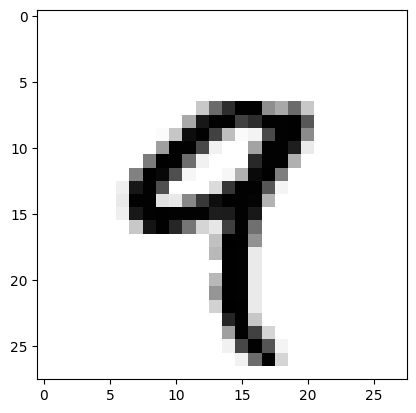

In [113]:
import matplotlib.pyplot as plt
#줄여 쓰겠다는 뜻
digit = train_images[4]
#대입하겠다는 뜻
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#prompt : visualize train_iamge[4] -> prompt 함수 쓰면 코드 알려줌 ㅎ

In [115]:
train_labels[4]
#손 글자가 뭘 쓴 건지 알려줌 그림은 9를 썼으니 9라고 알려줌

9

In [123]:
my_slice = train_images[10:100]
my_slice.shape
#60000개짜리 픽셀을 10번째에서 100번째 픽셀까지만 남기고 잘랐으니 90개가 남음

(90, 28, 28)

In [102]:
my_slice = train_images[10:100, :, :]
my_slice.shape
#범위를 지정하지 않고 :만 쓰면 냅두겠다는 뜻

(90, 28, 28)

In [103]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [107]:
my_slice = train_images[:, 14:, 14:]
#14번째에서 끝까지만 남기고 자르겠다는 뜻

In [108]:
my_slice = train_images[:, 7:-7, 7:-7]
# 7:-7 앞에서 7번째부터 뒤에서 7번째까지만 남기고 자른다는 뜻

### The notion of data batches

In [109]:
batch = train_images[:128]
#0번째 픽셀부터 128번째 픽셀까지 1조각 자름 (1번째 조각)

In [110]:
batch = train_images[128:256]
#128번째 픽셀부터 256번째 픽셀까지 1조각 자름 (2번째 조각)

In [111]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]
#128*n번째 픽셀부터 128*n+1번째 픽셀까지 1조각 자름 (n+1번째 조각)

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [ ]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

### Broadcasting

In [ ]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [ ]:
y = np.expand_dims(y, axis=0)

In [ ]:
Y = np.concatenate([y] * 32, axis=0)

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

In [ ]:
x = x.reshape((6, 1))
x

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

### Evaluating the model

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

## Summary